<center> <h1> Sentiment Analysis on Twitter Data Using Naive Bayes </h1> </center>


### Prepared By:
Bikash Adhikari [*077BEI015*]  
Subikshya Bista [*077BEI044*]

***
***

# Project Introduction
This project aims to deploy the Naive Bayes Classifier for Sentiment Analysis of Tweets. It classifies tweets either as Positive Tweet (1.0) or as Negative Tweet (0.0). The data is preprocessed and trained on the Naive Bayes Algorithm. It is then tested and evaluated using standard evaluation metrices (i.e. accuracy, recall , precision) and confusion matrix.

# Libraries Used
- NLTK
- Numpy
- Matplotlib
- String
- re
- seaborn
- scikit-learn

# DataSet Used
- Twitter Samples Dataset from NLTK Corpus

# Theory
## Naive Bayes Algorithm


The Naive Bayes algorithm is a probabilistic classifier based on Bayes' Theorem with the "naive" assumption of independence between the features. It is widely used in various applications, including text classification, spam filtering, and sentiment analysis due to its simplicity and effectiveness.

## Bayes' Theorem

At the core of the Naive Bayes algorithm is Bayes' Theorem, which describes the probability of an event based on prior knowledge of conditions related to the event. The theorem is given by:

$$
P(C \mid X) = \frac{P(X \mid C) \cdot P(C)}{P(X)}
$$

where:
- \( P(C | X) \) is the posterior probability of class \( C \) given the feature vector \( X \).
- \( P(X | C) \) is the likelihood of feature vector \( X \) given class \( C \).
- \( P(C) \) is the prior probability of class \( C \).
- \( P(X) \) is the marginal probability of feature vector \( X \).

## Naive Assumption

The "naive" assumption in Naive Bayes is that all features are independent given the class. This simplifies the computation of the likelihood \( P(X | C) \) as follows:

$$
P(X | C) = \prod_{i=1}^{n} P(x_i | C)
$$

where:
- \( x_i \) is the \( i \)-th feature in the feature vector \( X \).
- \( n \) is the total number of features.


## Training the Naive Bayes Classifier

To train a Naive Bayes classifier, the following steps are typically performed:

1. **Estimate Prior Probabilities**
   - Compute the prior probability of each class \( P(C) \).

2. **Estimate Likelihoods**
   - Compute the likelihood of each feature given each class \( P(x_i | C) \).

3. **Compute Posterior Probabilities**
   - Use Bayes' Theorem to compute the posterior probability for each class given the feature vector.

## Predicting with Naive Bayes

To classify a new instance, the algorithm computes the posterior probability for each class and selects the class with the highest probability. This can be written as:

$$
\hat{C} = \arg \max_{C} \left( P(C) \cdot \prod_{i=1}^{n} P(x_i | C) \right)
$$

where \( \hat{C} \) is the predicted class.


***

# Project Walkthrough
***

## Importing NLTK and NUMPY Libraries

In [139]:
import nltk
from nltk.corpus import twitter_samples
import numpy as np

## Downloading the Twitter Dataset from NLTK Library

In [5]:
#nltk.download('twitter_samples')
#nltk.data.path #Checking where is the data

['/home/adbik/nltk_data',
 '/usr/nltk_data',
 '/usr/share/nltk_data',
 '/usr/lib/nltk_data',
 '/usr/share/nltk_data',
 '/usr/local/share/nltk_data',
 '/usr/lib/nltk_data',
 '/usr/local/lib/nltk_data']

## Storing Positive Tweets and Negative Tweets Separately

In [6]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

print("The length of positive tweets are : ", len(positive_tweets))
print("The length of negative tweets are : ", len(negative_tweets))

## Exploring Positive and Negative Tweet Samples

In [8]:
random_tweet = np.random.randint(0, 5000)
print(random_tweet)

print(positive_tweets[random_tweet])
print(negative_tweets[random_tweet])

1373
Thank you @platform4prose :)
@ImJoanneT Ahh no what did you get done?? I hope you're okay :(


## Importing RegEx and String Library along with NLTK Modules for Preprocessing of the Tweets

In [140]:

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


## Removing Hyperlinks, Hashtags and Twitter Marks using RegEx

In [47]:
 # We first remove hyperlinks, twitter marks and styles using regular expressions

def remove_unwanted(tweet):
    # Removing hashtags
    clean_tweet = re.sub(r'#','',tweet)

    #Removing hyperlinks
    clean_tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', clean_tweet)
    
    #Removing old style Retweet text "RT"
    clean_tweet = re.sub(r'^RT[\s]+','',clean_tweet)
    
    return clean_tweet


## Checking the preprocessed tweets

In [48]:

print(random_tweet)
print(positive_tweets[random_tweet])
removed_tweet = remove_unwanted(positive_tweets[random_tweet])
print(removed_tweet)


1373
Thank you @platform4prose :)
Thank you @platform4prose :)


## Tokenizing the tweet i.e. Splitting the string into individual words

In [49]:
# We then tokenize the string i.e. split the string into individual words

tokenizer = TweetTokenizer(preserve_case = False, strip_handles=True, reduce_len=True)

def tokenize_tweet(tweet):
    tokened_tweet = tokenizer.tokenize(tweet)
    return tokened_tweet


## Removing Stop Words and Punctuations from the Tokenized Tweets

In [50]:
# We now remove stop words and punctuations

#nltk.download('stopwords')
#importing English stop words list from NLTK
stopwords_eng = stopwords.words('english')
punctuations = string.punctuation

def remove_stopwords_and_punctuations(tokened_tweets):
    clean_tokens = []

    for word in tokened_tweets:
        if(word not in stopwords_eng and word not in punctuations):
            clean_tokens.append(word)
    
    return clean_tokens

## Stemming i.e. Converting a word into its general form

In [51]:
# We now do stemming, which means to convert a word into its general form i.e. simple present form

stemmer = PorterStemmer()

def get_stem(tweets_clean):
    tweets_stem = []
    
    for word in tweets_clean:
        stem_word = stemmer.stem(word)
        tweets_stem.append(stem_word)

    return tweets_stem



## Testing the preprocessing, stemming and Stop Words Removal 

In [52]:
#Checking whether all the processes have worked

example_tweet = np.random.randint(0,500)
print("The raw tweet is: \n{}\n".format(positive_tweets[example_tweet]))
 
print("The tweet after removing hashtags and hyperlink is:\n{}\n ".format(remove_unwanted(positive_tweets[example_tweet])))

print("The tweet after tokenizing can be displayed as: \n{}\n".format(tokenize_tweet(remove_unwanted(positive_tweets[example_tweet]))))

print("The tokens after removing stopwords and punctuation is:\n {} \n".format(remove_stopwords_and_punctuations(tokenize_tweet(remove_unwanted(positive_tweets[example_tweet])))))

print("The tokens after stemming them is:\n{}\n".format(get_stem(remove_stopwords_and_punctuations(tokenize_tweet(remove_unwanted(positive_tweets[example_tweet]))))))

The raw tweet is: 
@OJBJ @holmesjsamuel surely this could be your warmup this morning ??? Coming on 15th to Bath :) xx

The tweet after removing hashtags and hyperlink is:
@OJBJ @holmesjsamuel surely this could be your warmup this morning ??? Coming on 15th to Bath :) xx
 
The tweet after tokenizing can be displayed as: 
['surely', 'this', 'could', 'be', 'your', 'warmup', 'this', 'morning', '?', '?', '?', 'coming', 'on', '15th', 'to', 'bath', ':)', 'xx']

The tokens after removing stopwords and punctuation is:
 ['surely', 'could', 'warmup', 'morning', 'coming', '15th', 'bath', ':)', 'xx'] 

The tokens after stemming them is:
['sure', 'could', 'warmup', 'morn', 'come', '15th', 'bath', ':)', 'xx']



## Defining a combined Preprocessing Function 

In [54]:
# Since all of these seem to work, we will now apply a combined function of all of there preprocessing techniques to the tweets

def combined_preprocessing(tweet):
    hashtags_and_links_removed = remove_unwanted(tweet)
    tokenized = tokenize_tweet(hashtags_and_links_removed)
    stopwords_and_punc_removed = remove_stopwords_and_punctuations(tokenized)
    stemmed_tokens = get_stem(stopwords_and_punc_removed)

    return stemmed_tokens

## Testing the Combined Preprocessing Function

In [55]:
ex_tweet = np.random.randint(1,5000)
print(positive_tweets[ex_tweet])
print(combined_preprocessing(positive_tweets[ex_tweet]))

@StepintolifeYvl Amazing news! Enjoy your toy :)
['amaz', 'news', 'enjoy', 'toy', ':)']


## Splitting the Data into Training and Testing Sets in 80:20 Ratio

In [56]:
#Splitting Data into Training and Testing Sets

train_positive = positive_tweets[:4000]
train_negative = negative_tweets[:4000]
test_positive = positive_tweets[4000:]
test_negative = negative_tweets[4000:]

train_x = train_positive + train_negative
test_x = test_positive + test_negative

train_y = np.append(np.ones(len(train_positive)), np.zeros(len(train_negative)))
test_y = np.append(np.ones(len(test_positive)), np.zeros(len(test_negative)))
#print(train_y.shape)
#print(test_y.shape)




## Creating Frequency Dictionary Function

In [57]:
#Creating a frequency dictionary

def create_freq_dict(tweets, y_values):
    freq_dictionary = {}

    for tweet, y in zip(tweets, y_values):
        for word in combined_preprocessing(tweet):
            pair = (word,y)
            if pair in freq_dictionary:
                freq_dictionary[pair] +=1
            else:
                freq_dictionary[pair] = 1
    
    return freq_dictionary

## Testing the Frequency Dictionary

In [58]:
#Testing the frequency dictionary

tweets = ['This is good','I am sad',"the post is a banger",'That disappointing','what a good day']
y_values = [1,0,1,0,1]

freq_d = create_freq_dict(tweets,y_values)
print(freq_d)

#Works !

{('good', 1): 2, ('sad', 0): 1, ('post', 1): 1, ('banger', 1): 1, ('disappoint', 0): 1, ('day', 1): 1}


## Creating a Frequecy Dictonary for the Training DataSet

In [136]:
#Creating the frequency dictionary

freq_dict = create_freq_dict(train_x,train_y)
sorted_freq_dict = {k:v for k,v in sorted(freq_dict.items(),key = lambda item: item[1], reverse = True)}
#print(sorted_freq_dict) 

## Training the Naive Bayes Model

### Input
**freq_dict** : frequency dictionary where (word, label) tuple is a key to the total number of times the word appears in the dataset  
**train_x** : the 'x' value of training data i.e. list of tweets  
**train_y** : the 'y' value of training data i.e. labels to the tweets  

### Output

**logprior** : the logarithm of the Prior Probability i.e.  

$$ \text{logprior} = \log \left( \frac{D_{\text{pos}}}{D_{\text{neg}}} \right) $$


 
log_likelihood: the logarithm of the likelihood for a word in a given class i.e.

$$
\text{loglikelihood}(w) = \log \left( \frac{P(w \mid \text{positive})}{P(w \mid \text{negative})} \right)
$$

where:

$$
P(w \mid \text{positive}) = \frac{f(w, 1) + 1}{N_{\text{pos}} + V}
$$

$$
P(w \mid \text{negative}) = \frac{f(w, 0) + 1}{N_{\text{neg}} + V}
$$

Here:
- \( f(w, 1) \) is the frequency of word \( w \) in positive tweets.
- \( f(w, 0) \) is the frequency of word \( w \) in negative tweets.
<!--
- \( N_{\text{pos}} \) $ is the total number of words in positive tweets.
- \( N_{\text{neg}} \) is the total number of words in negative tweets.
-->
- \( V \) is the number of unique words.



In [60]:
#Training the naive bayes algorithm'''

def train_naive_bayes(freq_dict, train_x, train_y):
    loglikelihood = {}
    logprior = 0

    #Calculating the number of unique words in a vocab
    unique_words = set([pair[0] for pair in freq_dict.keys()])
    V = len(unique_words) # Here 'V' is the total number of unique words in the positive and negative tweets (not-repeated)


    #calculating N_pos and N_neg
    N_pos = 0 #N_pos is the total number of words in positive tweets 
    N_neg = 0 #N_neg is the total number of words in negative tweets

    for pair in freq_dict.keys():
        if pair[1] > 0:
            N_pos += freq_dict[pair] 
        else:
            N_neg += freq_dict[pair] #possible error
     
    #Calculating the total number of tweets
    D = train_y.shape[0]
    #Calculating the toal number of positive tweets
    D_pos = sum(train_y)
    #Calculating the total number of negative tweets
    D_neg = D - D_pos

    #We now find the log-prior
    logprior = np.log(D_pos) - np.log(D_neg) # This is called log odds ratio (or log prior ratio)

    #for each unique word
    for word in unique_words:
        freq_pos = freq_dict.get((word,1),0)
        freq_neg = freq_dict.get((word,0),0)
        
        #Calculating the probability that word is positive and negative

        prob_postive = (freq_pos+1) / (N_pos + V)
        prob_negative = (freq_neg+1) / (N_neg + V )

        #Calculating the log likeihood of the word
        loglikelihood[word] = np.log(prob_postive) - np.log(prob_negative)

    return logprior, loglikelihood


## Testing whether the logprior is correct

In [141]:

D = train_y.shape[0]
D_pos = sum(train_y)
D_neg = D - D_pos
logprior = np.log(D_pos) - np.log(D_neg)
print(logprior)

0.0


## Predicting the Tweets

In [142]:
#Predicting the tweets

def predict(tweet, logprior, loglikelihood):
    processed_word_list = combined_preprocessing(tweet)
    p = 0 #Initializing the probability to zero
    p += logprior

    for word in processed_word_list:
        if word in loglikelihood:
            p+= loglikelihood[word]

    if p>0:
        p = 1.0
    else:
        p = 0.0

    return p

## Testing the model with random Tweets from Twitter

In [109]:
#Testing the predict function with random tweets from twitter

loglikelihood = train_naive_bayes(freq_dict,train_x, train_y)[1]

for tweet in ['Politicians are jerks whether new or old',
              'I had no idea sitting together and laughing at random stuff with my parents & siblings would become a luxury after a certain point in life',
              'Feeling sad for #Bangabandhu Sheikh Mujibur Rahman. Protesters vandalizing his memorials :( .. A nation that doesn\'t remember it\'s founding fathers, never has a bright future. This is him in London requesting support for their citizens!!',
              'While reading the news, it seems there is chaos everywhere. The interesting thing is that even with this chaos, we are enjoying a bull market. #NEPSE 😂😂😂',
              'Post 12 o\' clock is when shit really starts to hit. This is why I HAVE to sleep early.',
              'Utter disgrace! Shameful and disgusting!',
              'pretty sunrise 10/10, the sky has been doing the most these days ✨',
              'I\'m so hungry and I dont have access to any food :)',
              'so tired',
              'I really do not understand why beer is so popular, it tastes like puke and doesn\'t even get you drunk what is the purpose if you want sth to drink while you hangout just drink cocacola atleast that doesn\'t taste like torture']:
    p = predict(tweet, logprior,loglikelihood)
    print(f'{tweet}--> {p:.2f}') 



Politicians are jerks whether new or old--> 1.00
I had no idea sitting together and laughing at random stuff with my parents & siblings would become a luxury after a certain point in life--> 1.00
Feeling sad for #Bangabandhu Sheikh Mujibur Rahman. Protesters vandalizing his memorials :( .. A nation that doesn't remember it's founding fathers, never has a bright future. This is him in London requesting support for their citizens!!--> 0.00
While reading the news, it seems there is chaos everywhere. The interesting thing is that even with this chaos, we are enjoying a bull market. #NEPSE 😂😂😂--> 1.00
Post 12 o' clock is when shit really starts to hit. This is why I HAVE to sleep early.--> 0.00
Utter disgrace! Shameful and disgusting!--> 0.00
pretty sunrise 10/10, the sky has been doing the most these days ✨--> 1.00
I'm so hungry and I dont have access to any food :)--> 1.00
so tired--> 0.00
I really do not understand why beer is so popular, it tastes like puke and doesn't even get you drun

## Importing Libraries for Testing and Evaluation Metrics

In [118]:
#Testing and Evaluating
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix


## Creating an array of predicted 'y' values

In [115]:
y_pred = np.zeros(len(test_y))

for index, tweet in enumerate(test_x):
    predicted_y = predict(tweet, logprior, loglikelihood)
    y_pred[index] = predicted_y



In [ ]:
#Cross Check
#print(y_pred[1002])
#print(predict(test_x[1002], logprior,loglikelihood))

## Using Standard Functions for Determining Evaluation Metrics i.e. Accuracy, Precision and Recall

In [116]:
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y,y_pred,average = 'binary')
recall = recall_score(test_y,y_pred,average = 'binary')

In [117]:
print(f"The accuracy of the model is --> {accuracy}")
print(f"The precision of the model is: --> {precision}")
print(f"The recall score of the model is: --> {recall}")

The accuracy of the model is --> 0.994
The precision of the model is: --> 0.9959839357429718
The recall score of the model is: --> 0.992


## Importing Matplotlib and Seaborn for Visualizing the Confusion Matrix

In [121]:
from matplotlib import pyplot as plt
import seaborn as sns

## Creating and Visualizing Confusion Matrix

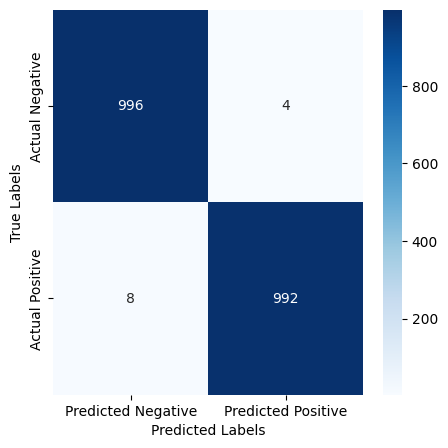

In [127]:
#Creating a confusion matrix

cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot= True, fmt = 'd', cmap ='Blues',xticklabels=['Predicted Negative','Predicted Positive'], yticklabels=['Actual Negative','Actual Positive'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Manually Calculating Evaluation Metrics using the Confusion Matrix

In [135]:
#Cross Checking Evaluation Metrics through the Confusion Matrix

calculated_accuracy = (cm[0][0]+ cm[1][1]) / (len(test_y))
print(f'The calculated accuracy is --> {calculated_accuracy}')

calculated_precision = ((cm[1][1]) / (cm[1][1] + cm[0][1] ))
print(f'The calculated precision is --> {calculated_precision}')

calculated_recall = (cm[1][1]/(cm[1][1]+cm[1][0]))
print(f'The calculated recall is --> {calculated_recall}')

The calculated accuracy is --> 0.994
The calculated precision is --> 0.9959839357429718
The calculated recall is --> 0.992


# Results and Observation  
The Naive Bayes Algorithm was implemented and its evaluation metrics were calculated. The accuracy was found to be **0.994**. Its precision was **0.996** and the recall was calulated to be **0.992**. Since the dataset was balanced i.e. 50% positive samples and 50% negative samples, the precision and recall were also very high along with its accuracy. It was also able to satisfactorily classify random tweets extracted from twitter that were not a part of this dataset. 

# Conclusion

Thus, we created a Sentiment Analysis tool for tweets using Naive Bayes Algorithm. As it was a standard dataset from the NLTK Corpus, it performed well with random tweets outside of the dataset. The model gave a very high accuracy, precision and recall - as it was a well-balanced dataset. The project significantly increased our understanding of the Naive Bayes Classifiers and their implementation using Python and its relevant libraries. 